In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as bayes
from sklearn.metrics import classification_report as classreport
from sklearn.metrics import confusion_matrix as confusion

data = datasets.load_digits()

In [2]:
x = data.data
y = data.target

xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2)

[0.9861111111111112, 0.9861111111111112, 0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9777777777777777, 0.9833333333333333, 0.9777777777777777, 0.975]
0.9839506172839507


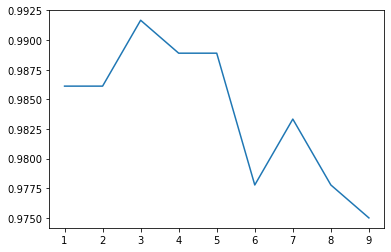

In [3]:
knnscore = []
for x in range(1,10):
    knnscore.append(knn(n_neighbors = x).fit(xtrain,ytrain).score(xtest,ytest))
print(knnscore)
knnavg = sum(knnscore)/len(knnscore)
print(knnavg)
plt.plot(range(1,10),knnscore)
# from the accuracy plot it seems that the common k=3 is the most accurate k value for this dataset

In [4]:
for x in ['linear', 'rbf', 'sigmoid', 'poly']:
    svmclass = SVC(kernel=x).fit(xtrain,ytrain)
    svmpred = svmclass.predict(xtest)
    print(f"report for {x}")
    print(classreport(ytest,svmpred))
    svmscore = svmclass.score(xtest,ytest)


report for linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.98        41
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.96        43
           4       1.00      1.00      1.00        39
           5       0.91      1.00      0.95        29
           6       1.00      0.97      0.99        34
           7       1.00      1.00      1.00        35
           8       0.97      0.97      0.97        36
           9       0.96      0.93      0.94        27

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

report for rbf
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00  

<AxesSubplot:>

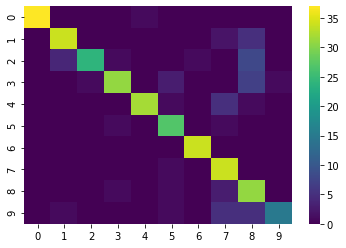

In [5]:
bclass = bayes().fit(xtrain,ytrain)
bpred = bclass.predict(xtest)
bscore = bclass.score(xtest,ytest)
sns.heatmap(confusion(ytest,bpred),cmap="viridis")

<BarContainer object of 3 artists>

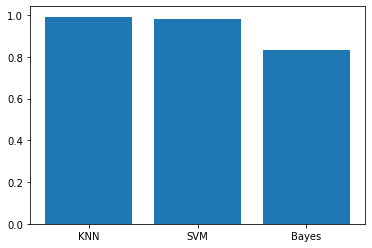

In [6]:
plt.bar(['KNN','SVM','Bayes'],[knnscore[2],svmscore,bscore])